Permasalahan:

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [7]:
from scipy import stats 

def handle_outlier(var):
    IQR = stats.iqr(df[var], interpolation = 'midpoint')   
    print('Interquartile range is', IQR) 

    Q1,Q3 = np.percentile(df[var] , [25,75])

    up_lim = Q3 + 1.5 * IQR 
    print('Batas Atas: ', up_lim) 

    print("Outlier:\n", df[df[var] > up_lim]['Negara'])
    df.drop(df[df[var] > up_lim].index, inplace=True)
    
handle_outlier('Pendapatan')
handle_outlier('GDPperkapita')

Interquartile range is 19445.0
Batas Atas:  51967.5
Outlier:
 23                   Brunei
82                   Kuwait
91               Luxembourg
114                  Norway
123                   Qatar
133               Singapore
145             Switzerland
157    United Arab Emirates
Name: Negara, dtype: object
Interquartile range is 10840.0
Batas Atas:  28410.0
Outlier:
 7           Australia
8             Austria
15            Belgium
29             Canada
42             Cyprus
44            Denmark
53            Finland
54             France
58            Germany
68            Iceland
73            Ireland
74             Israel
75              Italy
77              Japan
110       Netherlands
111       New Zealand
139             Spain
144            Sweden
158    United Kingdom
159     United States
Name: Negara, dtype: object


In [8]:
from sklearn import preprocessing

x = df.iloc[:,1:10] #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled,columns=['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi', 'Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])
df_scaled

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.105617,-1.275646,0.499782,-0.087881,-0.937851,0.061319,-1.477265,1.706485,-0.851443
1,-0.693821,-0.455398,0.064937,0.086851,-0.058255,-0.383049,0.928641,-0.984000,-0.279145
2,-0.432218,0.018523,-0.939851,-0.725419,0.255735,0.659197,0.952580,-0.183952,-0.219277
3,1.809745,1.107630,-1.497128,-0.182331,-0.484309,1.224756,-1.010448,1.925853,-0.369754
4,-0.847849,0.342065,-0.154597,0.573269,0.911203,-0.656852,0.988489,-0.674304,1.033081
...,...,...,...,...,...,...,...,...,...
134,-0.385765,0.392192,-0.483897,0.280474,-0.796185,-0.550922,-0.663327,0.209620,-0.460364
135,-0.681596,-0.432613,-0.627438,-1.377124,0.636330,3.334384,0.820914,-0.454936,1.243425
136,-0.530013,1.549653,0.187369,1.579161,-0.633376,0.300111,0.545611,-0.790440,-0.728958
137,0.276800,-0.364259,-0.513449,-0.583744,-0.634433,1.332482,-0.124691,0.964505,-0.728958


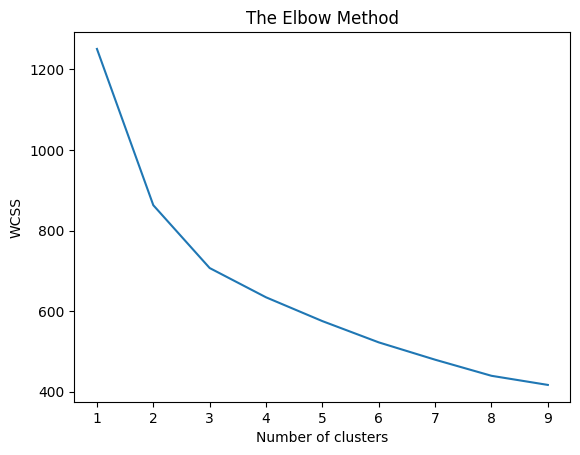

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
X = df_scaled
y = kmeans.fit_predict(X)
df['Cluster'] = y
df.groupby('Cluster').agg('mean')

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Cluster,,,,,,,,,
0,12.846154,62.953846,6.835385,59.650000,25473.076923,4.334269,76.026923,1.970000,16236.538462
1,26.702778,35.792903,6.270833,44.596749,9789.305556,8.562903,71.247222,2.467500,4791.416667
2,97.448780,26.029512,6.337805,42.387805,2188.609756,11.902317,59.043902,5.181951,1004.439024


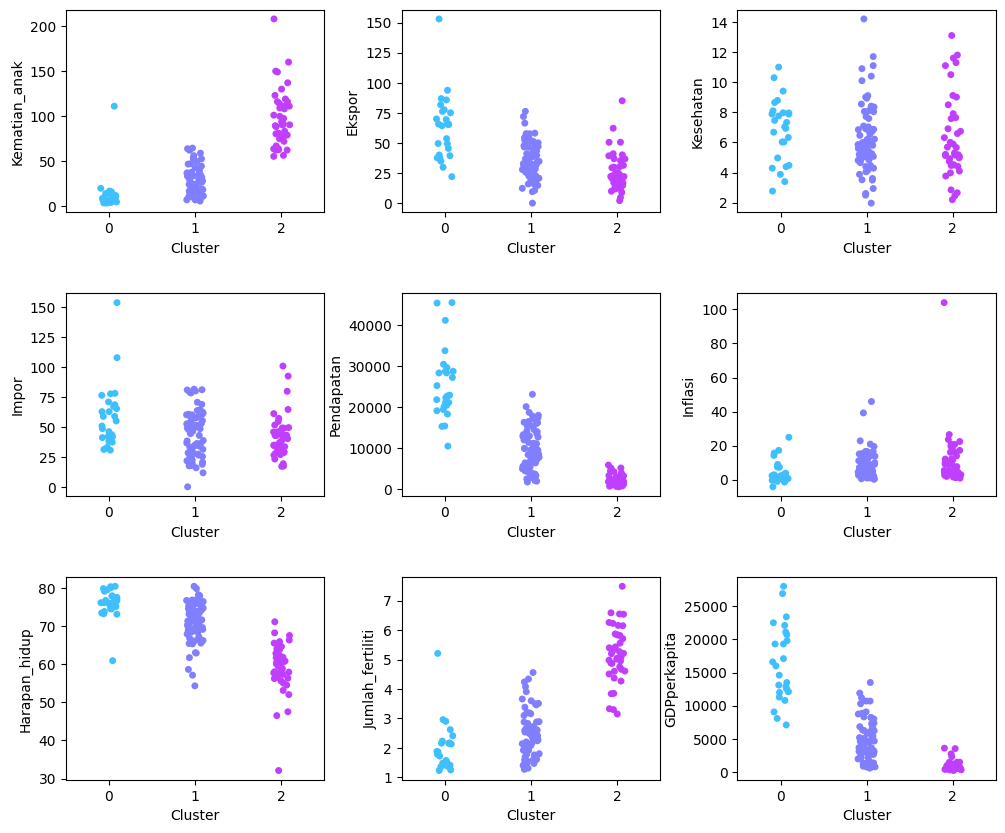

In [11]:
fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for idx, columns in zip(range(len(df.drop(columns=['Negara','Cluster']).columns)), df.drop(columns=['Negara','Cluster']).columns):
    ax = fig.add_subplot(3, 3, idx+1)
    sns.stripplot(x='Cluster', y=columns, data=df, palette="cool")

In [12]:
cluster_0 = df[df['Cluster']==0]
top_10_cluster_0 = cluster_0.sort_values(['Kematian_anak','Harapan_hidup','Jumlah_fertiliti','Pendapatan','GDPperkapita','Inflasi','Kesehatan','Impor','Ekspor'],
                      ascending=[False,True,False,True,True,False,True,False,False]).head(10)
top_10_cluster_0


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,0
117,Panama,19.7,70.0,8.10,78.2,15400,2.590,77.8,2.62,8080,0
89,Libya,16.6,65.6,3.88,42.1,29600,14.200,76.1,2.41,12100,0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.200,75.1,2.96,19300,0
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
96,Maldives,13.2,77.6,6.33,65.4,10500,2.880,77.9,2.23,7100,0
115,Oman,11.7,65.7,2.77,41.2,45300,15.600,76.1,2.90,19300,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
